Installing Requirements

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install matplotlib --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install seaborn --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                        STATE/UT  Year  Population  Literates - Males  \
14                ANDHRA PRADESH  2001    75728400           23444788   
28             ARUNACHAL PRADESH  2001     1098328             303281   
42                         ASSAM  2001    26638600            8188697   
0    Andaman and Nicobar Islands  2001      356650             146831   
56                         BIHAR  2001    82879910           20644376   
..                           ...   ...         ...                ...   
433                   TAMIL NADU  2014    72138958           28040491   
447                      TRIPURA  2014     3671032            1501369   
461                UTTAR PRADESH  2014   199581477           68234964   
475                  UTTARAKHAND  2014    10116752            3863708   
489                  WEST BENGAL  2014    91347736           33818810   

     Literates - Females  Population - Males  Population - Females  Year.1  \
14              16489535            22807968 

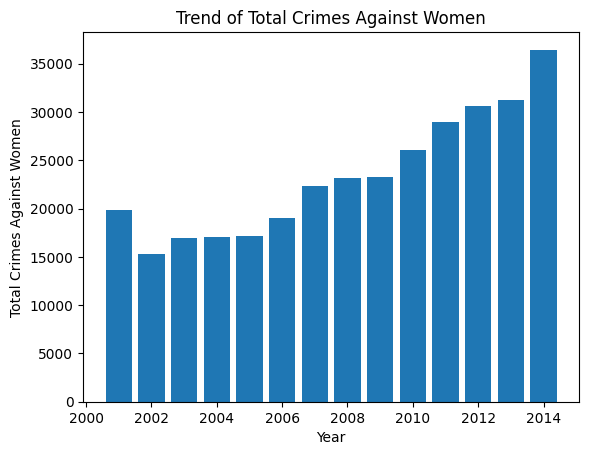

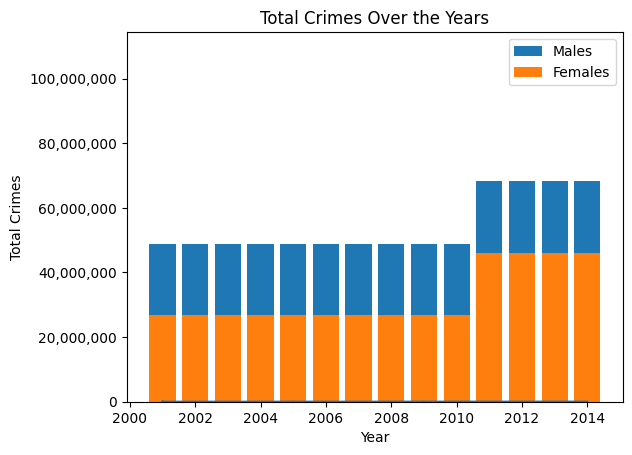

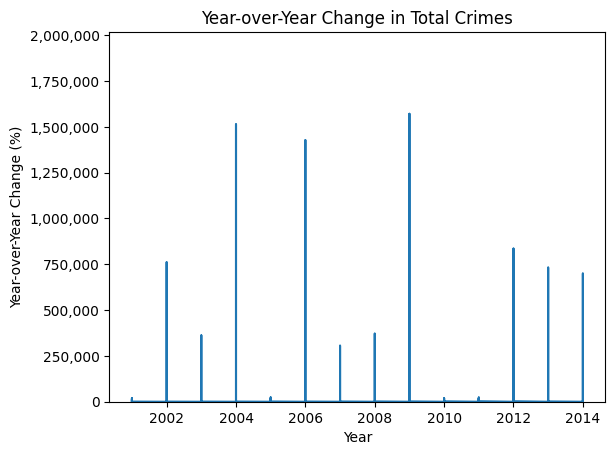

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a Pandas DataFrame
data = pd.read_csv("../data/DataOfCrimesInIndiaAgainstWomen.csv") 

# Sorting Year and States Accordingly
data.sort_values(by=['Year', 'STATE/UT'], inplace=True)
data = data.fillna(0)

print(data)

# Plotting the line graph with '--' markers for showing the Trend of Total Crimes Over the Years
x = data.get("Year")
y = data.get("Total Crimes against Women")
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Total Crimes Against Women')
plt.title('Trend of Total Crimes Against Women')
plt.show()


# Plotting a bar graph to show the trend of Literates over the Years.
x = data.get("Year")
y1 = data['Literates - Females']  # Females as y1
y2 = data['Literates - Males']   # Males as y2
plt.bar(x, y2, label='Males')
plt.bar(x, y1, label='Females')
plt.ylim(0, max(y1 + y2))

# Format y-axis ticks with commas
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.xlabel('Year')
plt.ylabel('Number of Literates')
plt.title('Trend of Literates (Females and Males)')
plt.legend()




# Plotting a Year over Year Comparison
data['Year-over-Year Change'] = data['Total Crimes against Women'].pct_change() * 100

# Plot the total crimes over the years
plt.plot(data['Year'], data['Total Crimes against Women'])
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Total Crimes Over the Years')
plt.show()

# Plot the year-over-year change
plt.plot(data['Year'][1:], data['Year-over-Year Change'][1:])  # Exclude the first year as it has no previous year to compare with
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Year-over-Year Change in Total Crimes')
plt.ylim(0, min(y1) * 100)

# Format y-axis ticks with commas
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()
